In [55]:
import glob
import os

import numpy as np
import pandas as pd
import seaborn as sns

In [56]:
ANNOTATION_DIR = R"C:\Users\user\AppData\Roaming\Godot\app_userdata\GodotWebsocketServer\gold_annotation"

In [57]:
MOTION = "SWING_LEFT"

In [58]:
file_pattern = os.path.join(ANNOTATION_DIR, "*.csv")
csv_files = glob.glob(file_pattern)
print(len(csv_files))
df = pd.concat(map(pd.read_csv, csv_files), ignore_index=True)

8


In [59]:
# Keeps values equal to 'X', changes everything else to 'Y'
df['motion_type'] = df['motion_type'].where(df['motion_type'] == f'{MOTION}', f'NOT_{MOTION}')

In [60]:
len(df)

269

In [61]:
df.head()

,gyro_x_0,gyro_y_0,gyro_z_0,accel_x_0,accel_y_0,accel_z_0,gyro_x_1,gyro_y_1,gyro_z_1,accel_x_1,...,accel_x_4,accel_y_4,accel_z_4,gyro_x_5,gyro_y_5,gyro_z_5,accel_x_5,accel_y_5,accel_z_5,motion_type
0,0.094428,-0.720844,0.777013,0.89025,-12.843750,-2.612513,0.00000,0.000000,0.000000,0.00000,...,3.879000,-3.748950,-8.397000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,NOT_SWING_LEFT
1,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,-0.05885,-0.298650,0.524517,5.39300,...,-76.785004,70.759056,21.894001,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,NOT_SWING_LEFT
2,0.073253,-0.283078,0.453750,4.65600,-12.122776,-1.741500,0.00000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,NOT_SWING_LEFT
3,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,-2.06723,-0.871613,-6.555670,-12.05658,...,0.027000,-3.603000,3.202950,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,NOT_SWING_LEFT
4,0.000000,0.000000,0.000000,4.27395,-34.944000,-38.773052,0.65890,11.824312,-11.209413,6.69300,...,5.471475,-6.936975,-1.344000,0.109587,0.174694,0.17435,6.108525,-8.61555,-2.526975,NOT_SWING_LEFT


<Axes: xlabel='motion_type', ylabel='count'>

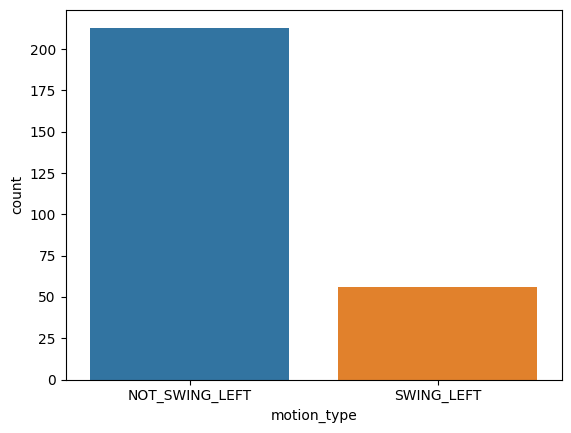

In [62]:
sns.countplot(df, x="motion_type", hue="motion_type")

In [63]:
X = df.drop(columns=["motion_type"]).values
y = df["motion_type"].values

In [64]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_enc = le.fit_transform(y)

In [65]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_enc, test_size=0.33, random_state=42)

In [66]:
from sklearn.linear_model import RidgeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import make_pipeline

In [67]:
clf_minirocket = GaussianNB()

clf_minirocket.fit(X_train, y_train)

,priors,None
,var_smoothing,1e-09


In [68]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score

In [69]:
precision_macro = make_scorer(
    precision_score, average="macro", zero_division=0
)

recall_macro = make_scorer(
    recall_score, average="macro", zero_division=0
)

f1_macro = make_scorer(
    f1_score, average="macro", zero_division=0
)

In [70]:
scores_accuracy = cross_val_score(
    clf_minirocket, X_test, y_test, cv=5, scoring="accuracy"
)

scores_precision = cross_val_score(
    clf_minirocket, X_test, y_test, cv=5, scoring=precision_macro
)

scores_recall = cross_val_score(
    clf_minirocket, X_test, y_test, cv=5, scoring=recall_macro
)

scores_f1 = cross_val_score(
    clf_minirocket, X_test, y_test, cv=5, scoring=f1_macro
)

In [71]:
print("MiniRocket Accuracy :", scores_accuracy.mean(), "±", scores_accuracy.std())
print("MiniRocket Precision:", scores_precision.mean(), "±", scores_precision.std())
print("MiniRocket Recall   :", scores_recall.mean(), "±", scores_recall.std())
print("MiniRocket F1-score :", scores_f1.mean(), "±", scores_f1.std())

MiniRocket Accuracy : 0.742483660130719 ± 0.053634609774976846
MiniRocket Precision: 0.7049062049062049 ± 0.06494628730987057
MiniRocket Recall   : 0.7682417582417582 ± 0.08616824700230537
MiniRocket F1-score : 0.7070214568040655 ± 0.06471368469176768


In [72]:
%%timeit
clf_minirocket.predict(X_test[0].reshape(1, -1))

58.4 μs ± 7.2 μs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


KNeighborsTimeSeriesClassifier (Euclidean)
3.48 ms ± 166 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)

KNeighborsTimeSeriesClassifier (DTW)
15.8 ms ± 504 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)

InceptionTimeClassifier
83 ms ± 7.64 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)